In [1]:
import os
mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-6.3.0-posix-seh-rt_v5-rev1\\mingw64\\bin'
os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

In [3]:
import numpy as np
import pandas as pd
import xgboost as xgb

from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation,metrics
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import LogisticRegressionCV

In [87]:
% pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\anaconda\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [4]:
train = pd.read_csv('train_data.csv')

In [5]:
test = pd.read_csv('test_data.csv')

In [6]:
train.describe()

D:\anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,loan_id,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history
count,100.000000,100.00000,100.000000,95.000000,95.000000,92.000000
mean,50.500000,4122.83000,1700.550000,134.221053,341.684211,0.836957
std,29.011492,2258.89434,1947.668891,63.456163,61.309342,0.371429
min,1.000000,1000.00000,0.000000,17.000000,60.000000,0.000000
25%,25.750000,2636.00000,0.000000,NaN,NaN,NaN
50%,50.500000,3598.00000,1558.500000,NaN,NaN,NaN
75%,75.250000,4710.00000,2394.500000,NaN,NaN,NaN
max,100.000000,12841.00000,10968.000000,349.000000,480.000000,1.000000


In [7]:
train.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,M,No,0,Graduate,No,5849,0,NaN,360.0,1.0,Urban
1,2,M,Yes,1,Graduate,No,4583,1508,128.0,360.0,1.0,Rural
2,3,M,Yes,0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban
3,4,M,Yes,0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban
4,5,M,No,0,Graduate,No,6000,0,141.0,360.0,1.0,Urban


In [29]:
df = pd.concat([train,test])

In [30]:
len(df)

600

In [31]:
len(train),len(test)

(100, 500)

In [32]:
df.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area
0,1,M,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,2,M,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,3,M,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,4,M,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,5,M,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [33]:
df['gender'].value_counts()

M    480
F    108
Name: gender, dtype: int64

In [34]:
df['gender'] = df['gender'].fillna('M')

In [35]:
df['gender'] = pd.Series(np.where(df.gender.values=='M',1,0),df.index)

In [36]:
df['gender'].value_counts()

1    492
0    108
Name: gender, dtype: int64

In [37]:
df['marital_status'].value_counts()

Yes    387
No     210
Name: marital_status, dtype: int64

In [38]:
df['marital_status'] = df['marital_status'].fillna('Yes')

In [39]:
df['marital_status'] = pd.Series(np.where(df.marital_status.values=='Yes',1,0),df.index)

In [40]:
df['marital_status'].value_counts()

1    390
0    210
Name: marital_status, dtype: int64

In [41]:
df.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [42]:
df['dependents'].describe()

count     586
unique      4
top         0
freq      338
Name: dependents, dtype: object

In [43]:
df['dependents'].value_counts()

0     338
2     100
1      98
3+     50
Name: dependents, dtype: int64

In [44]:
df['dependents'] = df['dependents'].fillna('0')

In [45]:
df['dependents'].value_counts()

0     352
2     100
1      98
3+     50
Name: dependents, dtype: int64

In [53]:
type(df['dependents'][0])

pandas.core.series.Series

In [54]:
df['dependents'] = df['dependents'].apply(lambda x:int(x[0]))

In [55]:
df['dependents'].value_counts()

0    352
2    100
1     98
3     50
Name: dependents, dtype: int64

In [56]:
df['qualification'].value_counts()

Graduate        469
Not Graduate    131
Name: qualification, dtype: int64

In [57]:
df['qualification'] = pd.Series(np.where(df.qualification.values=='Graduate',1,0),df.index)

In [58]:
df['qualification'].value_counts()

1    469
0    131
Name: qualification, dtype: int64

In [59]:
df.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [60]:
df['is_self_employed'].value_counts()

No     488
Yes     80
Name: is_self_employed, dtype: int64

In [61]:
df['is_self_employed'] = df['is_self_employed'].fillna('No')

In [62]:
df['is_self_employed'] = pd.Series(np.where(df.is_self_employed.values=='Yes',1,0),df.index)

In [63]:
df['is_self_employed'].value_counts()

0    520
1     80
Name: is_self_employed, dtype: int64

In [64]:
df['applicant_income'].describe()

count      600.000000
mean      5446.285000
std       6160.635131
min        150.000000
25%       2892.750000
50%       3839.500000
75%       5818.250000
max      81000.000000
Name: applicant_income, dtype: float64

In [65]:
df['co_applicant_income'].describe()

count      600.000000
mean      1620.943200
std       2950.565348
min          0.000000
25%          0.000000
50%       1149.000000
75%       2287.750000
max      41667.000000
Name: co_applicant_income, dtype: float64

In [67]:
df['loan_amount'] = df['loan_amount'].fillna(df['loan_amount'].mean())

In [68]:
df['loan_amount'].describe()

count    600.000000
mean     146.208981
std       83.581972
min        9.000000
25%      100.750000
50%      128.500000
75%      162.500000
max      700.000000
Name: loan_amount, dtype: float64

In [69]:
df.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history', 'property_area'],
      dtype='object')

In [71]:
df['loan_amount_term'] = df['loan_amount_term'].fillna(df['loan_amount_term'].mean())

In [72]:
df['loan_amount_term'].describe()

count    600.00000
mean     342.18430
std       64.39346
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: loan_amount_term, dtype: float64

In [74]:
df['credit_history'].value_counts()

1.0    465
0.0     88
Name: credit_history, dtype: int64

In [75]:
df['credit_history'] = df['credit_history'].fillna(1.0)

In [76]:
df['credit_history'].value_counts()

1.0    512
0.0     88
Name: credit_history, dtype: int64

In [79]:
df['property_area'].value_counts()

Semiurban    230
Urban        195
Rural        175
Name: property_area, dtype: int64

In [83]:
df = pd.get_dummies(df)

In [84]:
df.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1,1,0,0,1,0,5849,0.0,146.208981,360.0,1.0,0.0,0.0,1.0
1,2,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1.0,0.0,0.0
2,3,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0.0,0.0,1.0
3,4,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0.0,0.0,1.0
4,5,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0.0,0.0,1.0


In [85]:
df.corr()[((df.corr() < -0.85) | (df.corr() > 0.85)) & (df.corr() != 1)]

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area_Rural,property_area_Semiurban,property_area_Urban
loan_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital_status,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
qualification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_self_employed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
applicant_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
co_applicant_income,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount_term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


{'boxes': [<matplotlib.lines.Line2D at 0x1313b65e470>],
 'caps': [<matplotlib.lines.Line2D at 0x1313b663e10>,
 'fliers': [<matplotlib.lines.Line2D at 0x1313b669f98>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1313b6697f0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1313b65eda0>,
  <matplotlib.lines.Line2D at 0x1313b65ef28>]}

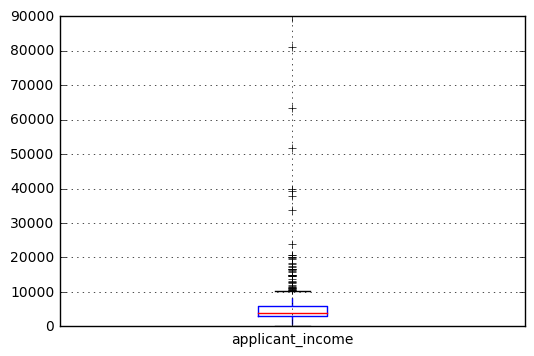

In [89]:
df.boxplot(column='applicant_income',return_type='dict')

In [90]:
X_train = df[:100]

In [92]:
X_train.tail()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area_Rural,property_area_Semiurban,property_area_Urban
95,96,1,0,0,1,0,6782,0.0,146.208981,360.0,1.0,0.0,0.0,1.0
96,97,0,1,0,1,0,2484,2302.0,137.000000,360.0,1.0,0.0,1.0,0.0
97,98,1,1,0,1,0,1977,997.0,50.000000,360.0,1.0,0.0,1.0,0.0
98,99,1,1,0,0,0,4188,0.0,115.000000,180.0,1.0,0.0,1.0,0.0
99,100,1,1,0,1,0,1759,3541.0,131.000000,360.0,1.0,0.0,1.0,0.0


In [93]:
X_test = df[100:]

In [94]:
X_test.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area_Rural,property_area_Semiurban,property_area_Urban
0,1349,1,0,0,1,0,4843,3806.0,151.000000,360.0,1.0,0.0,1.0,0.0
1,1350,1,1,0,1,0,13650,0.0,146.208981,360.0,1.0,0.0,0.0,1.0
2,1356,1,1,0,1,0,4652,3583.0,146.208981,360.0,1.0,0.0,1.0,0.0
3,1357,1,1,0,1,0,3816,754.0,160.000000,360.0,1.0,0.0,0.0,1.0
4,1369,1,1,2,1,0,11417,1126.0,225.000000,360.0,1.0,0.0,0.0,1.0


In [100]:
X_train['status'] = pd.read_csv('train_prediction.csv')['status']

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [101]:
X_train.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area_Rural,property_area_Semiurban,property_area_Urban,status
0,1,1,0,0,1,0,5849,0.0,146.208981,360.0,1.0,0.0,0.0,1.0,Y
1,2,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1.0,0.0,0.0,N
2,3,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0.0,0.0,1.0,Y
3,4,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0.0,0.0,1.0,Y
4,5,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0.0,0.0,1.0,Y


In [102]:
X_train['status'] = pd.Series(np.where(X_train.status.values=='Y',1,0),X_train.index)

D:\anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [103]:
X_train.head()

,loan_id,gender,marital_status,dependents,qualification,is_self_employed,applicant_income,co_applicant_income,loan_amount,loan_amount_term,credit_history,property_area_Rural,property_area_Semiurban,property_area_Urban,status
0,1,1,0,0,1,0,5849,0.0,146.208981,360.0,1.0,0.0,0.0,1.0,1
1,2,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1.0,0.0,0.0,0
2,3,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0.0,0.0,1.0,1
3,4,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0.0,0.0,1.0,1
4,5,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0.0,0.0,1.0,1


In [104]:
X_train.columns

Index(['loan_id', 'gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history',
       'property_area_Rural', 'property_area_Semiurban', 'property_area_Urban',
       'status'],
      dtype='object')

In [105]:
feature = ['gender', 'marital_status', 'dependents', 'qualification',
       'is_self_employed', 'applicant_income', 'co_applicant_income',
       'loan_amount', 'loan_amount_term', 'credit_history',
       'property_area_Rural', 'property_area_Semiurban', 'property_area_Urban']
target = 'status'

In [106]:
param_test = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,3,5]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])

NameError: name 'gsearch1' is not defined

In [107]:
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.71236, std: 0.18521, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.71648, std: 0.18318, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.71868, std: 0.18556, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.71648, std: 0.18370, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 7, 'min_child_weight': 1

In [108]:
param_test = {
 'max_depth':[6,7,8],
 'min_child_weight':[1,3,5]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.72088, std: 0.18595, params: {'max_depth': 6, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 6, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 6, 'min_child_weight': 5},
  mean: 0.71868, std: 0.18556, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.71648, std: 0.18370, params: {'max_depth': 8, 'min_child_weight': 1},
  mean: 0.59615, std: 0.13617, params: {'max_depth': 8, 'min_child_weight': 3},
  mean: 0.58617, std: 0.18616, params: {'max_depth': 8, 'min_child_weight': 5}],
 {'max_depth': 6, 'min_child_weight': 1},
 0.72087912087912087)

In [109]:
param_test = {
 'gamma':[i/100.0 for i in range(0,9)]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.72088, std: 0.18595, params: {'gamma': 0.0},
  mean: 0.71658, std: 0.19127, params: {'gamma': 0.01},
  mean: 0.72308, std: 0.18644, params: {'gamma': 0.02},
  mean: 0.71676, std: 0.18389, params: {'gamma': 0.03},
  mean: 0.72088, std: 0.18673, params: {'gamma': 0.04},
  mean: 0.72308, std: 0.18735, params: {'gamma': 0.05},
  mean: 0.72940, std: 0.19089, params: {'gamma': 0.06},
  mean: 0.72134, std: 0.18204, params: {'gamma': 0.07},
  mean: 0.72518, std: 0.18289, params: {'gamma': 0.08}],
 {'gamma': 0.06},
 0.72939560439560436)

In [110]:
param_test = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=1, gamma=0.06, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.72418, std: 0.18837, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.71053, std: 0.19423, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.70769, std: 0.18201, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.70476, std: 0.17599, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.72527, std: 0.18884, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.69808, std: 0.18277, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.71236, std: 0.18521, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.71310, std: 0.18548, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.72793, std: 0.19022, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.71319, std: 0.19262, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.72940, std: 0.19089, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.71960, std: 0.18871, params: {'colsample_bytree': 0.8, 'subsample'

In [111]:
param_test = {
 'subsample':[0.75,0.80,0.85],
 'colsample_bytree':[0.75,0.80,0.85]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=1, gamma=0.06, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.71136, std: 0.19126, params: {'colsample_bytree': 0.75, 'subsample': 0.75},
  mean: 0.71236, std: 0.18521, params: {'colsample_bytree': 0.75, 'subsample': 0.8},
  mean: 0.70595, std: 0.18416, params: {'colsample_bytree': 0.75, 'subsample': 0.85},
  mean: 0.72079, std: 0.18218, params: {'colsample_bytree': 0.8, 'subsample': 0.75},
  mean: 0.72940, std: 0.19089, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.71282, std: 0.18587, params: {'colsample_bytree': 0.8, 'subsample': 0.85},
  mean: 0.71612, std: 0.18492, params: {'colsample_bytree': 0.85, 'subsample': 0.75},
  mean: 0.71007, std: 0.18568, params: {'colsample_bytree': 0.85, 'subsample': 0.8},
  mean: 0.71850, std: 0.20061, params: {'colsample_bytree': 0.85, 'subsample': 0.85}],
 {'colsample_bytree': 0.8, 'subsample': 0.8},
 0.72939560439560436)

In [112]:
param_test = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=1, gamma=0.06, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.72940, std: 0.19089, params: {'reg_alpha': 1e-05},
  mean: 0.72509, std: 0.19468, params: {'reg_alpha': 0.01},
  mean: 0.74451, std: 0.19862, params: {'reg_alpha': 0.1},
  mean: 0.77079, std: 0.18935, params: {'reg_alpha': 1},
  mean: 0.50000, std: 0.00000, params: {'reg_alpha': 100}],
 {'reg_alpha': 1},
 0.77078754578754594)

In [113]:
param_test = {
 'reg_alpha':[0.1,0.5,1,2,3]
}
gsearch = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=1, gamma=0.06, subsample=0.8, colsample_bytree=0.8,reg_alpha=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train[feature],X_train[target])
gsearch.grid_scores_, gsearch.best_params_, gsearch.best_score_

([mean: 0.74451, std: 0.19862, params: {'reg_alpha': 0.1},
  mean: 0.76914, std: 0.19277, params: {'reg_alpha': 0.5},
  mean: 0.77079, std: 0.18935, params: {'reg_alpha': 1},
  mean: 0.78810, std: 0.14682, params: {'reg_alpha': 2},
  mean: 0.76832, std: 0.14609, params: {'reg_alpha': 3}],
 {'reg_alpha': 2},
 0.78809523809523818)

In [114]:
xgb = XGBClassifier( learning_rate =0.1, n_estimators=1000, max_depth=6,
 min_child_weight=1, gamma=0.06, subsample=0.8, colsample_bytree=0.8,reg_alpha=1,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [115]:
xgb.fit(X_train[feature],X_train['status'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.06, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=1000, nthread=4, objective='binary:logistic',
       reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

In [117]:
pred = xgb.predict(X_test[feature])

In [120]:
def convert(x):
    if x==0:
        return 'N'
    else:
        return 'Y'

In [126]:
submission = pd.DataFrame()
submission['loan_id'] = X_test['loan_id']
submission['status'] = pred
submission['status'] = submission['status'].apply(lambda x: convert(x))
submission.to_csv('train_prediction.csv',index=False)
submission.head()

,loan_id,status
0,1349,N
1,1350,Y
2,1356,N
3,1357,Y
4,1369,Y
